In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##file from processor 0 and iteration 1, to get header data for making the global grid
my_file = "output_0_1.txt" 

##read data header using pandas
data_header = pd.read_csv(my_file, sep="\s+", header=None, comment='#', nrows=18)
#get no of rows of processor
rows = data_header[0][9]
#get no of columns of processor
cols = data_header[0][11]
#get no of processors used
p_nos = data_header[0][13]
#get global imax
imax = data_header[0][15]
#get global jmax
jmax = data_header[0][17]

#cast variables as integers
rows = int(rows)
cols = int(cols)
p_nos = int(p_nos)
imax = int(imax)
jmax = int(jmax)
print(rows)
print(cols)
print(p_nos)



3
3
9


In [273]:
import numpy as np


grids_i = np.zeros((rows,cols), dtype=int)
grids_j = np.zeros((rows,cols), dtype=int)
domain =np.zeros((imax,jmax), dtype=int)

file = "output_"
file_end = "_95.txt" #the "95" is the iteration number, it can be changed to any other iteration number
for p in range(p_nos):
    fname = file + str(p) + file_end #dynamically get file name
    foo = open(fname) #open file
    foo.readline() #skip first line
    imax_local = int(foo.readline()) #get imax local
    foo.readline() #skip third line
    jmax_local = int(foo.readline()) #get jmax local
    foo.readline() #skip fifth line
    id_row = int(foo.readline()) #get processor row id
    foo.readline() #skip seventh line
    id_col = int(foo.readline()) #get processor column id
    foo.readline() # skip ninth line
    p_row = int(foo.readline()) #get global number of rows
    foo.readline() #skip eleventh line
    p_col = int(foo.readline()) #get global number of columns

    if id_row ==0:
        grids_i[id_row, id_col] = 0 #starting from processor 0
    if id_col ==0:
        grids_j[id_row, id_col] = 0 #starting from processor 0
    if (id_row<p_row-1): #check if not out of bounds
        grids_i[id_row+1, id_col]=grids_i[id_row, id_col]+(imax_local) #get length on i-axis
    if(id_col<p_col-1): #check if not out of bounds
        grids_j[id_row, id_col+1]=grids_j[id_row, id_col]+(jmax_local) #get length on j-axis
        
    domain_local = np.loadtxt(fname, skiprows=18) #load the processor's data

    for i in range (0, imax_local):
        for j in range (0, jmax_local):
            domain[i+grids_i[id_row, id_col], j+grids_j[id_row, id_col]]= domain_local[i][j] #fill in data from the processor
np.savetxt('result.txt',domain,fmt='%.0f') #save to file


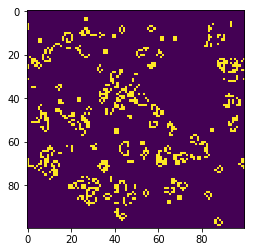

In [270]:
plt.imshow(domain)